In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from scipy.stats import percentileofscore

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [3]:
#Pre COVID Tech data

tech_before_covid = ["FB", "AMZN", "AAPL", "GOOGL"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes 
start_date = pd.Timestamp('2017-02-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-02-14', tz='America/New_York').isoformat()

pre_tech_df = api.get_barset(
    tech_before_covid,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df


pre_tech_df = pre_tech_df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [4]:
pre_tech_df.head()

,AAPL,AMZN,FB,GOOGL
,close,close,close,close
2017-02-15 00:00:00-05:00,135.510,842.72,133.43,837.30
2017-02-16 00:00:00-05:00,135.345,844.12,133.80,842.17
2017-02-17 00:00:00-05:00,135.710,845.06,133.52,846.53
2017-02-21 00:00:00-05:00,136.690,856.44,133.72,849.27
2017-02-22 00:00:00-05:00,137.100,855.60,136.10,851.39


In [5]:
#Pre COVID pharmaceutical data

pharma_before_covid = ["PFE", "MRK", "JNJ", "NVS"]

timeframe = "1D"

start_date = pd.Timestamp('2017-02-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-02-14', tz='America/New_York').isoformat()

pre_pharma_df = api.get_barset(
    pharma_before_covid,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop  columns
pre_pharma_df = pre_pharma_df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [6]:
pre_pharma_df.head()

,JNJ,MRK,NVS,PFE
,close,close,close,close
2017-02-15 00:00:00-05:00,117.2000,65.16,75.83,33.49
2017-02-16 00:00:00-05:00,118.1199,65.26,76.73,33.62
2017-02-17 00:00:00-05:00,118.8400,65.39,77.21,33.62
2017-02-21 00:00:00-05:00,119.6300,65.48,77.05,33.61
2017-02-22 00:00:00-05:00,119.4900,65.27,76.84,33.58


In [7]:
#Pre COVID tarvel data

travel_before_covid = ["EXPE", "BA", "BKNG", "AAL"]

timeframe = "1D"

start_date = pd.Timestamp('2017-02-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-02-14', tz='America/New_York').isoformat()

pre_travel_df = api.get_barset(
    travel_before_covid,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop  columns
pre_travel_df = pre_travel_df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [8]:
pre_travel_df.head()

,AAL,BA,BKNG,EXPE
,close,close,close,close
2017-02-15 00:00:00-05:00,47.14,169.30,1648.95,120.88
2017-02-16 00:00:00-05:00,46.57,170.79,1647.50,119.85
2017-02-17 00:00:00-05:00,46.91,172.70,1637.20,119.40
2017-02-21 00:00:00-05:00,46.42,175.50,1647.00,119.40
2017-02-22 00:00:00-05:00,45.93,175.36,1651.73,120.56


## Monte Carlo- Tech

In [9]:
tech_daily_returns=pre_tech_df.pct_change().dropna()
tech_daily_returns.head()

,AAPL,AMZN,FB,GOOGL
,close,close,close,close
2017-02-16 00:00:00-05:00,-0.001218,0.001661,0.002773,0.005816
2017-02-17 00:00:00-05:00,0.002697,0.001114,-0.002093,0.005177
2017-02-21 00:00:00-05:00,0.007221,0.013466,0.001498,0.003237
2017-02-22 00:00:00-05:00,0.002999,-0.000981,0.017798,0.002496
2017-02-23 00:00:00-05:00,-0.004158,-0.003986,-0.005511,-0.000482


In [10]:
tech_daily_volatility = tech_daily_returns.std()
tech_daily_volatility

AAPL   close    0.015783
AMZN   close    0.017550
FB     close    0.018535
GOOGL  close    0.014561
dtype: float64

In [11]:
apple_volatility= tech_daily_volatility['AAPL']['close']
amazon_volatility= tech_daily_volatility['AMZN']['close']
facebook_volatility= tech_daily_volatility['FB']['close']
google_volatility=tech_daily_volatility['GOOGL']['close']

In [12]:
apple_last_price=pre_tech_df['AAPL']['close'][-1]
amazon_last_price=pre_tech_df['AMZN']['close'][-1]
facebook_last_price=pre_tech_df['FB']['close'][-1]
google_last_price=pre_tech_df['GOOGL']['close'][-1]

In [13]:
number_simulations = 1000
number_records = 107
tech_monte_carlo = pd.DataFrame()
np.random.seed(50)

In [14]:
for tech in range(number_simulations):
    print(f"Returning Simulation {tech+1}/1000...")
    
    apple = [apple_last_price]
    amazon = [amazon_last_price]
    facebook = [facebook_last_price]
    google = [google_last_price]
    
    for i in range(number_records):
        apple.append(apple[-1] * (1 + np.random.normal(tech_daily_returns.mean()["AAPL"]["close"], apple_volatility)))
        amazon.append(amazon[-1] * (1 + np.random.normal(tech_daily_returns.mean()["AMZN"]["close"], amazon_volatility)))
        facebook.append(facebook[-1] * (1 + np.random.normal(tech_daily_returns.mean()["FB"]["close"], facebook_volatility)))
        google.append(google[-1] * (1 + np.random.normal(tech_daily_returns.mean()["GOOGL"]["close"], google_volatility)))
        
    tech_portfolio = pd.DataFrame({"Apple Simulated Prices": apple, "Amazon Simulated Prices": amazon,
                                   "Facebook Simulated Prices": facebook, "Google Simulated Prices": google})

    tech_portfolio_returns=tech_portfolio.pct_change()
    
    apple_weight = 0.25
    amazon_weight = 0.25
    facebook_weight = 0.25
    google_weight = 0.25
    
    
    tech_portfolio_returns = apple_weight * tech_portfolio_returns["Apple Simulated Prices"]+ amazon_weight * tech_portfolio_returns["Amazon Simulated Prices"] + facebook_weight * tech_portfolio_returns["Facebook Simulated Prices"]+ google_weight * tech_portfolio_returns["Google Simulated Prices"]
        
    tech_monte_carlo[tech] = (1 + tech_portfolio_returns.fillna(0)).cumprod()  

Returning Simulation 1/1000...
Returning Simulation 2/1000...
Returning Simulation 3/1000...
Returning Simulation 4/1000...
Returning Simulation 5/1000...
Returning Simulation 6/1000...
Returning Simulation 7/1000...
Returning Simulation 8/1000...
Returning Simulation 9/1000...
Returning Simulation 10/1000...
Returning Simulation 11/1000...
Returning Simulation 12/1000...
Returning Simulation 13/1000...
Returning Simulation 14/1000...
Returning Simulation 15/1000...
Returning Simulation 16/1000...
Returning Simulation 17/1000...
Returning Simulation 18/1000...
Returning Simulation 19/1000...
Returning Simulation 20/1000...
Returning Simulation 21/1000...
Returning Simulation 22/1000...
Returning Simulation 23/1000...
Returning Simulation 24/1000...
Returning Simulation 25/1000...
Returning Simulation 26/1000...
Returning Simulation 27/1000...
Returning Simulation 28/1000...
Returning Simulation 29/1000...
Returning Simulation 30/1000...
Returning Simulation 31/1000...
Returning Simulat

Returning Simulation 253/1000...
Returning Simulation 254/1000...
Returning Simulation 255/1000...
Returning Simulation 256/1000...
Returning Simulation 257/1000...
Returning Simulation 258/1000...
Returning Simulation 259/1000...
Returning Simulation 260/1000...
Returning Simulation 261/1000...
Returning Simulation 262/1000...
Returning Simulation 263/1000...
Returning Simulation 264/1000...
Returning Simulation 265/1000...
Returning Simulation 266/1000...
Returning Simulation 267/1000...
Returning Simulation 268/1000...
Returning Simulation 269/1000...
Returning Simulation 270/1000...
Returning Simulation 271/1000...
Returning Simulation 272/1000...
Returning Simulation 273/1000...
Returning Simulation 274/1000...
Returning Simulation 275/1000...
Returning Simulation 276/1000...
Returning Simulation 277/1000...
Returning Simulation 278/1000...
Returning Simulation 279/1000...
Returning Simulation 280/1000...
Returning Simulation 281/1000...
Returning Simulation 282/1000...
Returning 

Returning Simulation 502/1000...
Returning Simulation 503/1000...
Returning Simulation 504/1000...
Returning Simulation 505/1000...
Returning Simulation 506/1000...
Returning Simulation 507/1000...
Returning Simulation 508/1000...
Returning Simulation 509/1000...
Returning Simulation 510/1000...
Returning Simulation 511/1000...
Returning Simulation 512/1000...
Returning Simulation 513/1000...
Returning Simulation 514/1000...
Returning Simulation 515/1000...
Returning Simulation 516/1000...
Returning Simulation 517/1000...
Returning Simulation 518/1000...
Returning Simulation 519/1000...
Returning Simulation 520/1000...
Returning Simulation 521/1000...
Returning Simulation 522/1000...
Returning Simulation 523/1000...
Returning Simulation 524/1000...
Returning Simulation 525/1000...
Returning Simulation 526/1000...
Returning Simulation 527/1000...
Returning Simulation 528/1000...
Returning Simulation 529/1000...
Returning Simulation 530/1000...
Returning Simulation 531/1000...
Returning 

Returning Simulation 751/1000...
Returning Simulation 752/1000...
Returning Simulation 753/1000...
Returning Simulation 754/1000...
Returning Simulation 755/1000...
Returning Simulation 756/1000...
Returning Simulation 757/1000...
Returning Simulation 758/1000...
Returning Simulation 759/1000...
Returning Simulation 760/1000...
Returning Simulation 761/1000...
Returning Simulation 762/1000...
Returning Simulation 763/1000...
Returning Simulation 764/1000...
Returning Simulation 765/1000...
Returning Simulation 766/1000...
Returning Simulation 767/1000...
Returning Simulation 768/1000...
Returning Simulation 769/1000...
Returning Simulation 770/1000...
Returning Simulation 771/1000...
Returning Simulation 772/1000...
Returning Simulation 773/1000...
Returning Simulation 774/1000...
Returning Simulation 775/1000...
Returning Simulation 776/1000...
Returning Simulation 777/1000...
Returning Simulation 778/1000...
Returning Simulation 779/1000...
Returning Simulation 780/1000...
Returning 

Returning Simulation 1000/1000...


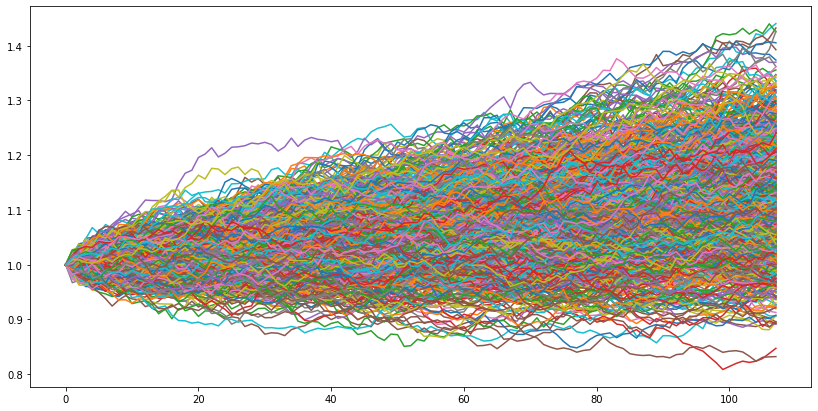

In [15]:
tech_monte_carlo.plot(legend=None, figsize=(14,7))

## Monte Carlo- Pharma

In [16]:
pharma_daily_returns=pre_pharma_df.pct_change().dropna()
pharma_daily_returns.head()

,JNJ,MRK,NVS,PFE
,close,close,close,close
2017-02-16 00:00:00-05:00,0.007849,0.001535,0.011869,0.003882
2017-02-17 00:00:00-05:00,0.006096,0.001992,0.006256,0.000000
2017-02-21 00:00:00-05:00,0.006648,0.001376,-0.002072,-0.000297
2017-02-22 00:00:00-05:00,-0.001170,-0.003207,-0.002726,-0.000893
2017-02-23 00:00:00-05:00,0.018328,0.009039,0.007939,0.014145


In [17]:
pharma_daily_volatility = pharma_daily_returns.std()
pharma_daily_volatility

JNJ  close    0.010757
MRK  close    0.011400
NVS  close    0.011176
PFE  close    0.010988
dtype: float64

In [18]:
jnj_volatility= pharma_daily_volatility['JNJ']['close']
mrk_volatility= pharma_daily_volatility['MRK']['close']
nvs_volatility= pharma_daily_volatility['NVS']['close']
pfe_volatility=pharma_daily_volatility['PFE']['close']

In [19]:
jnj_last_price=pre_pharma_df['JNJ']['close'][-1]
mrk_last_price=pre_pharma_df['MRK']['close'][-1]
nvs_last_price=pre_pharma_df['NVS']['close'][-1]
pfe_last_price=pre_pharma_df['PFE']['close'][-1]

In [20]:
pharma_monte_carlo = pd.DataFrame()

In [21]:
for pharma in range(number_simulations):
    print(f"Returning Simulation {pharma+1}/1000...")
    
    jnj = [jnj_last_price]
    mrk = [mrk_last_price]
    nvs = [nvs_last_price]
    pfe = [pfe_last_price]
    
    for i in range(number_records):
        jnj.append(jnj[-1] * (1 + np.random.normal(pharma_daily_returns.mean()["JNJ"]["close"], jnj_volatility)))
        mrk.append(mrk[-1] * (1 + np.random.normal(pharma_daily_returns.mean()["MRK"]["close"], mrk_volatility)))
        nvs.append(nvs[-1] * (1 + np.random.normal(pharma_daily_returns.mean()["NVS"]["close"], nvs_volatility)))
        pfe.append(pfe[-1] * (1 + np.random.normal(pharma_daily_returns.mean()["PFE"]["close"], pfe_volatility)))
        
    pharma_portfolio = pd.DataFrame({"JNJ Simulated Prices": jnj, "MRK Simulated Prices": mrk,
                                   "NVS Simulated Prices": nvs, "PFE Simulated Prices": pfe})

    pharma_portfolio_returns=pharma_portfolio.pct_change()
    
    jnj_weight = 0.25
    mrk_weight = 0.25
    nvs_weight = 0.25
    pfe_weight = 0.25
    
    
    pharma_portfolio_returns = jnj_weight * pharma_portfolio_returns["JNJ Simulated Prices"]+ mrk_weight * pharma_portfolio_returns["MRK Simulated Prices"] + nvs_weight * pharma_portfolio_returns["NVS Simulated Prices"]+ pfe_weight * pharma_portfolio_returns["PFE Simulated Prices"]
        
    pharma_monte_carlo[pharma] = (1 + pharma_portfolio_returns.fillna(0)).cumprod()  

Returning Simulation 1/1000...
Returning Simulation 2/1000...
Returning Simulation 3/1000...
Returning Simulation 4/1000...
Returning Simulation 5/1000...
Returning Simulation 6/1000...
Returning Simulation 7/1000...
Returning Simulation 8/1000...
Returning Simulation 9/1000...
Returning Simulation 10/1000...
Returning Simulation 11/1000...
Returning Simulation 12/1000...
Returning Simulation 13/1000...
Returning Simulation 14/1000...
Returning Simulation 15/1000...
Returning Simulation 16/1000...
Returning Simulation 17/1000...
Returning Simulation 18/1000...
Returning Simulation 19/1000...
Returning Simulation 20/1000...
Returning Simulation 21/1000...
Returning Simulation 22/1000...
Returning Simulation 23/1000...
Returning Simulation 24/1000...
Returning Simulation 25/1000...
Returning Simulation 26/1000...
Returning Simulation 27/1000...
Returning Simulation 28/1000...
Returning Simulation 29/1000...
Returning Simulation 30/1000...
Returning Simulation 31/1000...
Returning Simulat

Returning Simulation 253/1000...
Returning Simulation 254/1000...
Returning Simulation 255/1000...
Returning Simulation 256/1000...
Returning Simulation 257/1000...
Returning Simulation 258/1000...
Returning Simulation 259/1000...
Returning Simulation 260/1000...
Returning Simulation 261/1000...
Returning Simulation 262/1000...
Returning Simulation 263/1000...
Returning Simulation 264/1000...
Returning Simulation 265/1000...
Returning Simulation 266/1000...
Returning Simulation 267/1000...
Returning Simulation 268/1000...
Returning Simulation 269/1000...
Returning Simulation 270/1000...
Returning Simulation 271/1000...
Returning Simulation 272/1000...
Returning Simulation 273/1000...
Returning Simulation 274/1000...
Returning Simulation 275/1000...
Returning Simulation 276/1000...
Returning Simulation 277/1000...
Returning Simulation 278/1000...
Returning Simulation 279/1000...
Returning Simulation 280/1000...
Returning Simulation 281/1000...
Returning Simulation 282/1000...
Returning 

Returning Simulation 502/1000...
Returning Simulation 503/1000...
Returning Simulation 504/1000...
Returning Simulation 505/1000...
Returning Simulation 506/1000...
Returning Simulation 507/1000...
Returning Simulation 508/1000...
Returning Simulation 509/1000...
Returning Simulation 510/1000...
Returning Simulation 511/1000...
Returning Simulation 512/1000...
Returning Simulation 513/1000...
Returning Simulation 514/1000...
Returning Simulation 515/1000...
Returning Simulation 516/1000...
Returning Simulation 517/1000...
Returning Simulation 518/1000...
Returning Simulation 519/1000...
Returning Simulation 520/1000...
Returning Simulation 521/1000...
Returning Simulation 522/1000...
Returning Simulation 523/1000...
Returning Simulation 524/1000...
Returning Simulation 525/1000...
Returning Simulation 526/1000...
Returning Simulation 527/1000...
Returning Simulation 528/1000...
Returning Simulation 529/1000...
Returning Simulation 530/1000...
Returning Simulation 531/1000...
Returning 

Returning Simulation 751/1000...
Returning Simulation 752/1000...
Returning Simulation 753/1000...
Returning Simulation 754/1000...
Returning Simulation 755/1000...
Returning Simulation 756/1000...
Returning Simulation 757/1000...
Returning Simulation 758/1000...
Returning Simulation 759/1000...
Returning Simulation 760/1000...
Returning Simulation 761/1000...
Returning Simulation 762/1000...
Returning Simulation 763/1000...
Returning Simulation 764/1000...
Returning Simulation 765/1000...
Returning Simulation 766/1000...
Returning Simulation 767/1000...
Returning Simulation 768/1000...
Returning Simulation 769/1000...
Returning Simulation 770/1000...
Returning Simulation 771/1000...
Returning Simulation 772/1000...
Returning Simulation 773/1000...
Returning Simulation 774/1000...
Returning Simulation 775/1000...
Returning Simulation 776/1000...
Returning Simulation 777/1000...
Returning Simulation 778/1000...
Returning Simulation 779/1000...
Returning Simulation 780/1000...
Returning 

Returning Simulation 1000/1000...


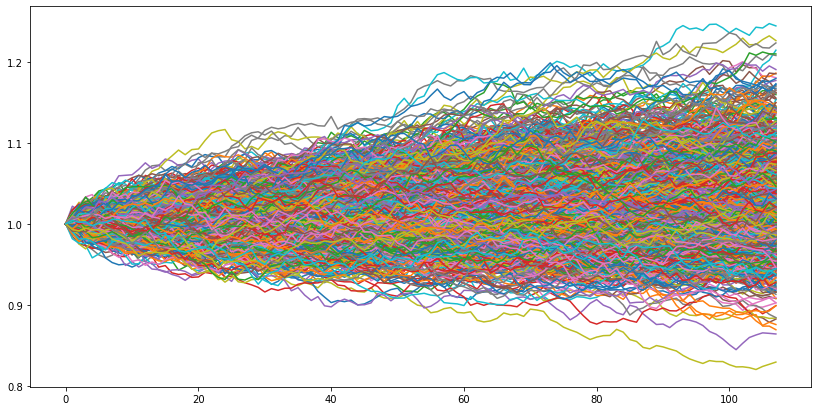

In [22]:
pharma_monte_carlo.plot(legend=None, figsize=(14,7))

## Monte Carlo-Travel

In [23]:
travel_daily_returns=pre_travel_df.pct_change().dropna()
travel_daily_returns.head()

,AAL,BA,BKNG,EXPE
,close,close,close,close
2017-02-16 00:00:00-05:00,-0.012092,0.008801,-0.000879,-0.008521
2017-02-17 00:00:00-05:00,0.007301,0.011183,-0.006252,-0.003755
2017-02-21 00:00:00-05:00,-0.010446,0.016213,0.005986,0.000000
2017-02-22 00:00:00-05:00,-0.010556,-0.000798,0.002872,0.009715
2017-02-23 00:00:00-05:00,0.003701,0.008554,-0.008936,-0.007797


In [24]:
travel_daily_volatility = travel_daily_returns.std()
travel_daily_volatility

AAL   close    0.022654
BA    close    0.016995
BKNG  close    0.015473
EXPE  close    0.019777
dtype: float64

In [25]:
aair_volatility= travel_daily_volatility['AAL']['close']
boeing_volatility= travel_daily_volatility['BA']['close']
booking_volatility= travel_daily_volatility['BKNG']['close']
expedia_volatility=travel_daily_volatility['EXPE']['close']

In [26]:
aair_last_price=pre_travel_df['AAL']['close'][-1]
boeing_last_price=pre_travel_df['BA']['close'][-1]
booking_last_price=pre_travel_df['BKNG']['close'][-1]
expedia_last_price=pre_travel_df['EXPE']['close'][-1]

In [27]:
travel_monte_carlo = pd.DataFrame()

In [28]:
for travel in range(number_simulations):
    print(f"Returning Simulation {travel+1}/1000...")
    
    aair = [aair_last_price]
    boeing = [boeing_last_price]
    booking = [booking_last_price]
    expedia = [expedia_last_price]
    
    for i in range(number_records):
        aair.append(aair[-1] * (1 + np.random.normal(travel_daily_returns.mean()["AAL"]["close"], aair_volatility)))
        boeing.append(boeing[-1] * (1 + np.random.normal(travel_daily_returns.mean()["BA"]["close"], boeing_volatility)))
        booking.append(booking[-1] * (1 + np.random.normal(travel_daily_returns.mean()["BKNG"]["close"], booking_volatility)))
        expedia.append(expedia[-1] * (1 + np.random.normal(travel_daily_returns.mean()["EXPE"]["close"], expedia_volatility)))
        
    travel_portfolio = pd.DataFrame({"American Air Simulated Prices": aair, "Boeing Simulated Prices": boeing,
                                   "Booking Holdings Simulated Prices": booking, "Expedia Simulated Prices": expedia})

    travel_portfolio_returns=travel_portfolio.pct_change()
    
    aair_weight = 0.25
    boeing_weight = 0.25
    booking_weight = 0.25
    expedia_weight = 0.25
    
    
    travel_portfolio_returns = aair_weight * travel_portfolio_returns["American Air Simulated Prices"]+ boeing_weight * travel_portfolio_returns["Boeing Simulated Prices"] + booking_weight * travel_portfolio_returns["Booking Holdings Simulated Prices"]+ expedia_weight * travel_portfolio_returns["Expedia Simulated Prices"]
        
    travel_monte_carlo[travel] = (1 + travel_portfolio_returns.fillna(0)).cumprod()  

Returning Simulation 1/1000...
Returning Simulation 2/1000...
Returning Simulation 3/1000...
Returning Simulation 4/1000...
Returning Simulation 5/1000...
Returning Simulation 6/1000...
Returning Simulation 7/1000...
Returning Simulation 8/1000...
Returning Simulation 9/1000...
Returning Simulation 10/1000...
Returning Simulation 11/1000...
Returning Simulation 12/1000...
Returning Simulation 13/1000...
Returning Simulation 14/1000...
Returning Simulation 15/1000...
Returning Simulation 16/1000...
Returning Simulation 17/1000...
Returning Simulation 18/1000...
Returning Simulation 19/1000...
Returning Simulation 20/1000...
Returning Simulation 21/1000...
Returning Simulation 22/1000...
Returning Simulation 23/1000...
Returning Simulation 24/1000...
Returning Simulation 25/1000...
Returning Simulation 26/1000...
Returning Simulation 27/1000...
Returning Simulation 28/1000...
Returning Simulation 29/1000...
Returning Simulation 30/1000...
Returning Simulation 31/1000...
Returning Simulat

Returning Simulation 253/1000...
Returning Simulation 254/1000...
Returning Simulation 255/1000...
Returning Simulation 256/1000...
Returning Simulation 257/1000...
Returning Simulation 258/1000...
Returning Simulation 259/1000...
Returning Simulation 260/1000...
Returning Simulation 261/1000...
Returning Simulation 262/1000...
Returning Simulation 263/1000...
Returning Simulation 264/1000...
Returning Simulation 265/1000...
Returning Simulation 266/1000...
Returning Simulation 267/1000...
Returning Simulation 268/1000...
Returning Simulation 269/1000...
Returning Simulation 270/1000...
Returning Simulation 271/1000...
Returning Simulation 272/1000...
Returning Simulation 273/1000...
Returning Simulation 274/1000...
Returning Simulation 275/1000...
Returning Simulation 276/1000...
Returning Simulation 277/1000...
Returning Simulation 278/1000...
Returning Simulation 279/1000...
Returning Simulation 280/1000...
Returning Simulation 281/1000...
Returning Simulation 282/1000...
Returning 

Returning Simulation 502/1000...
Returning Simulation 503/1000...
Returning Simulation 504/1000...
Returning Simulation 505/1000...
Returning Simulation 506/1000...
Returning Simulation 507/1000...
Returning Simulation 508/1000...
Returning Simulation 509/1000...
Returning Simulation 510/1000...
Returning Simulation 511/1000...
Returning Simulation 512/1000...
Returning Simulation 513/1000...
Returning Simulation 514/1000...
Returning Simulation 515/1000...
Returning Simulation 516/1000...
Returning Simulation 517/1000...
Returning Simulation 518/1000...
Returning Simulation 519/1000...
Returning Simulation 520/1000...
Returning Simulation 521/1000...
Returning Simulation 522/1000...
Returning Simulation 523/1000...
Returning Simulation 524/1000...
Returning Simulation 525/1000...
Returning Simulation 526/1000...
Returning Simulation 527/1000...
Returning Simulation 528/1000...
Returning Simulation 529/1000...
Returning Simulation 530/1000...
Returning Simulation 531/1000...
Returning 

Returning Simulation 751/1000...
Returning Simulation 752/1000...
Returning Simulation 753/1000...
Returning Simulation 754/1000...
Returning Simulation 755/1000...
Returning Simulation 756/1000...
Returning Simulation 757/1000...
Returning Simulation 758/1000...
Returning Simulation 759/1000...
Returning Simulation 760/1000...
Returning Simulation 761/1000...
Returning Simulation 762/1000...
Returning Simulation 763/1000...
Returning Simulation 764/1000...
Returning Simulation 765/1000...
Returning Simulation 766/1000...
Returning Simulation 767/1000...
Returning Simulation 768/1000...
Returning Simulation 769/1000...
Returning Simulation 770/1000...
Returning Simulation 771/1000...
Returning Simulation 772/1000...
Returning Simulation 773/1000...
Returning Simulation 774/1000...
Returning Simulation 775/1000...
Returning Simulation 776/1000...
Returning Simulation 777/1000...
Returning Simulation 778/1000...
Returning Simulation 779/1000...
Returning Simulation 780/1000...
Returning 

Returning Simulation 1000/1000...


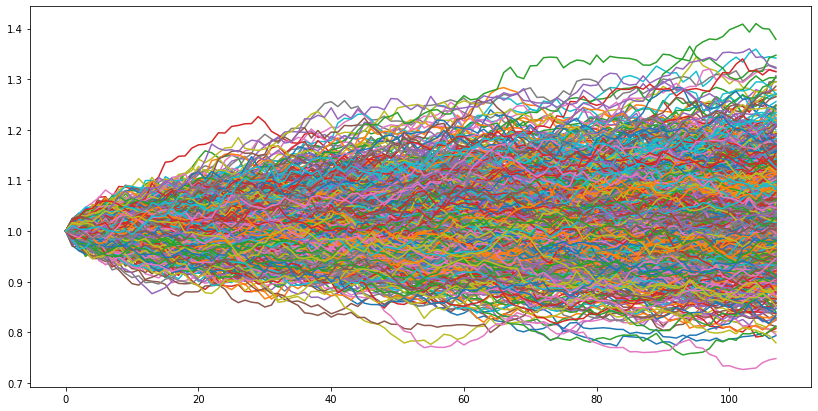

In [29]:
travel_monte_carlo.plot(legend=None, figsize=(14,7))

# Post Covid- Tech

In [30]:
tech_after_covid = ["FB", "AMZN", "AAPL", "GOOGL"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes 
start_date = pd.Timestamp('2020-02-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

post_tech_df = api.get_barset(
    tech_after_covid,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df


post_tech_df = post_tech_df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [31]:
post_tech_df.head()

,AAPL,AMZN,FB,GOOGL
,close,close,close,close
2020-02-18 00:00:00-05:00,319.00,2155.67,217.76,1519.44
2020-02-19 00:00:00-05:00,323.62,2170.21,217.50,1524.88
2020-02-20 00:00:00-05:00,320.30,2153.59,214.58,1516.97
2020-02-21 00:00:00-05:00,313.03,2095.97,210.16,1483.47
2020-02-24 00:00:00-05:00,298.17,2008.74,200.73,1419.37


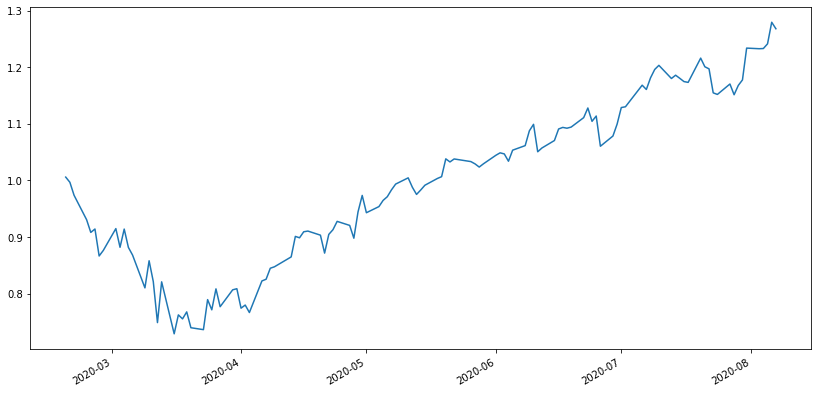

In [32]:
weights = [0.25, 0.25,.25,.25]
tech_daily_returns= post_tech_df.pct_change().dropna()
tech_returns = tech_daily_returns.dot(weights)
tech_cumulative_returns = (1 +tech_returns).cumprod()
tech_cumulative_returns.plot(figsize=(14,7))

In [33]:
tech_simulated_ending_prices = tech_monte_carlo.iloc[-1, :]
tech_simulated_ending_prices

0      1.016818
1      1.113909
2      1.208085
3      1.068072
4      1.222272
         ...   
995    1.103226
996    1.165738
997    0.966439
998    1.344983
999    1.025684
Name: 107, Length: 1000, dtype: float64

In [34]:
tech_final_return=tech_cumulative_returns[-1]
tech_final_return

1.2680635227758832

In [35]:
tech_simulated_ending_prices.value_counts(bins=50) / len(tech_simulated_ending_prices)

(1.148, 1.161]    0.060
(1.075, 1.088]    0.055
(1.124, 1.136]    0.053
(1.039, 1.051]    0.047
(1.112, 1.124]    0.047
(1.051, 1.063]    0.046
(1.173, 1.185]    0.045
(1.136, 1.148]    0.044
(1.185, 1.197]    0.044
(1.161, 1.173]    0.043
(1.1, 1.112]      0.040
(1.088, 1.1]      0.039
(1.063, 1.075]    0.035
(1.027, 1.039]    0.035
(1.197, 1.209]    0.035
(1.015, 1.027]    0.030
(1.209, 1.221]    0.027
(1.27, 1.282]     0.023
(1.221, 1.234]    0.022
(1.234, 1.246]    0.022
(1.002, 1.015]    0.020
(1.246, 1.258]    0.019
(1.258, 1.27]     0.019
(0.99, 1.002]     0.019
(0.966, 0.978]    0.018
(0.978, 0.99]     0.015
(0.954, 0.966]    0.013
(1.282, 1.294]    0.009
(1.307, 1.319]    0.008
(1.294, 1.307]    0.008
(0.942, 0.954]    0.008
(1.319, 1.331]    0.007
(0.917, 0.929]    0.007
(0.929, 0.942]    0.007
(1.331, 1.343]    0.005
(0.893, 0.905]    0.004
(0.905, 0.917]    0.004
(1.343, 1.355]    0.003
(1.355, 1.367]    0.003
(0.881, 0.893]    0.002
(1.428, 1.44]     0.002
(1.416, 1.428]  

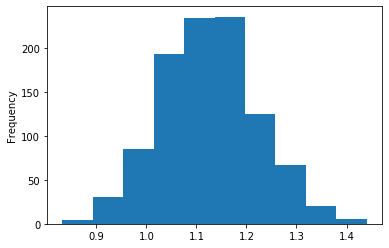

In [36]:
tech_simulated_ending_prices.plot(kind='hist', legend=None)

In [37]:
tech_percentile = tech_final_return
tech_confidence_interval=(percentileofscore(tech_simulated_ending_prices, tech_percentile))
print(f'{tech_confidence_interval}% confidence interval for tech industry')

92.4% confidence interval for tech industry


## Post Covid- Pharma

In [38]:
pharma_after_covid = ["PFE", "MRK", "JNJ", "NVS"]

timeframe = "1D"

start_date = pd.Timestamp('2020-02-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

post_pharma_df = api.get_barset(
    pharma_after_covid,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop  columns
post_pharma_df = post_pharma_df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [39]:
post_pharma_df.head()

,JNJ,MRK,NVS,PFE
,close,close,close,close
2020-02-18 00:00:00-05:00,149.12,82.46,97.205,36.3100
2020-02-19 00:00:00-05:00,148.94,82.00,97.220,36.2354
2020-02-20 00:00:00-05:00,148.35,82.49,96.290,35.8400
2020-02-21 00:00:00-05:00,149.98,82.34,96.780,35.7200
2020-02-24 00:00:00-05:00,146.00,81.34,90.070,34.6800


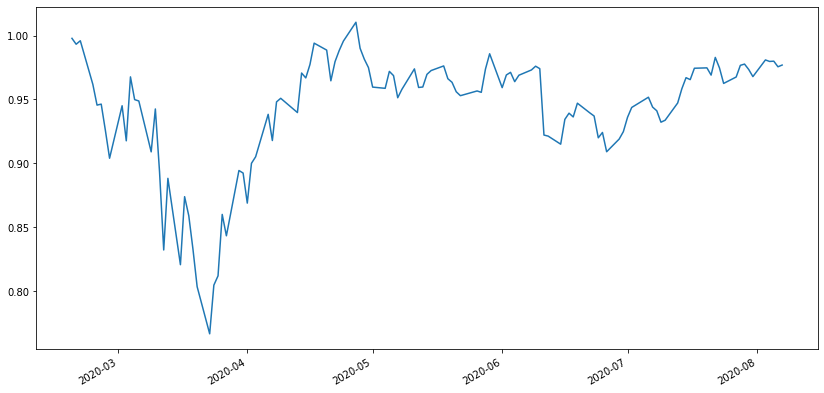

In [40]:
pharma_daily_returns= post_pharma_df.pct_change().dropna()
pharma_returns = pharma_daily_returns.dot(weights)
pharma_cumulative_returns = (1 +pharma_returns).cumprod()
pharma_cumulative_returns.plot(figsize=(14,7))

In [41]:
pharma_simulated_ending_prices = pharma_monte_carlo.iloc[-1, :]
pharma_simulated_ending_prices

0      0.992532
1      1.038726
2      1.049111
3      1.025238
4      1.047334
         ...   
995    1.081587
996    0.981622
997    0.989663
998    1.009752
999    0.944448
Name: 107, Length: 1000, dtype: float64

In [42]:
pharma_final_return=pharma_cumulative_returns[-1]
pharma_final_return

0.9769289272389505

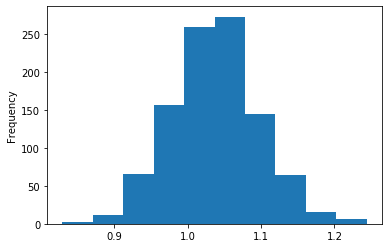

In [43]:
pharma_simulated_ending_prices.plot(kind='hist', legend=None)

In [44]:
pharma_percentile = pharma_final_return
pharma_confidence_interval=(percentileofscore(pharma_simulated_ending_prices, pharma_percentile))
print(f'{pharma_confidence_interval}% confidence interval for pharmaceutical industry')

15.1% confidence interval for pharmaceutical industry


In [45]:
pharma_simulated_ending_prices.value_counts(bins=50) / len(pharma_simulated_ending_prices)

(1.037, 1.045]    0.073
(1.004, 1.012]    0.067
(1.028, 1.037]    0.059
(1.062, 1.07]     0.055
(1.02, 1.028]     0.054
(1.045, 1.053]    0.054
(1.012, 1.02]     0.047
(1.07, 1.078]     0.046
(1.053, 1.062]    0.045
(0.987, 0.995]    0.045
(1.078, 1.086]    0.037
(1.086, 1.095]    0.034
(0.995, 1.004]    0.033
(1.095, 1.103]    0.032
(0.97, 0.979]     0.032
(0.979, 0.987]    0.031
(0.954, 0.962]    0.029
(1.111, 1.12]     0.023
(1.12, 1.128]     0.023
(0.937, 0.946]    0.021
(0.946, 0.954]    0.021
(0.962, 0.97]     0.020
(1.103, 1.111]    0.019
(1.136, 1.145]    0.019
(1.128, 1.136]    0.011
(0.921, 0.929]    0.010
(0.912, 0.921]    0.008
(1.153, 1.161]    0.007
(1.161, 1.169]    0.006
(0.929, 0.937]    0.006
(1.169, 1.178]    0.004
(0.896, 0.904]    0.004
(1.178, 1.186]    0.004
(1.145, 1.153]    0.004
(0.879, 0.887]    0.003
(0.904, 0.912]    0.003
(1.219, 1.227]    0.002
(0.863, 0.871]    0.002
(1.203, 1.211]    0.002
(0.871, 0.879]    0.001
(1.236, 1.244]    0.001
(1.186, 1.194]  

## Post COVID- Travel

In [46]:
travel_after_covid = ["EXPE", "BA", "BKNG", "AAL"]

timeframe = "1D"

start_date = pd.Timestamp('2020-02-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

post_travel_df = api.get_barset(
    travel_after_covid,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop  columns
post_travel_df = post_travel_df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [47]:
post_travel_df.head()

,AAL,BA,BKNG,EXPE
,close,close,close,close
2020-02-18 00:00:00-05:00,28.630,338.92,1975.63,121.09
2020-02-19 00:00:00-05:00,28.330,338.26,1969.62,121.89
2020-02-20 00:00:00-05:00,28.510,336.29,1969.25,121.63
2020-02-21 00:00:00-05:00,27.825,330.41,1927.58,120.13
2020-02-24 00:00:00-05:00,25.450,317.90,1791.53,112.32


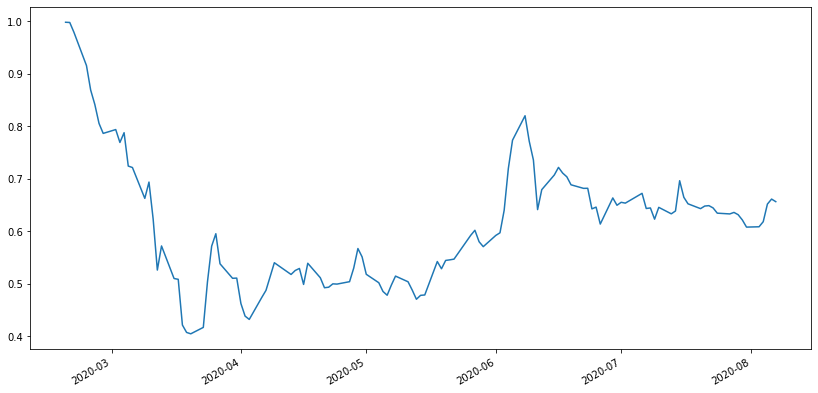

In [48]:
travel_daily_returns= post_travel_df.pct_change().dropna()
travel_returns = travel_daily_returns.dot(weights)
travel_cumulative_returns = (1 +travel_returns).cumprod()
travel_cumulative_returns.plot(figsize=(14,7))

In [50]:
travel_simulated_ending_prices = travel_monte_carlo.iloc[-1, :]
travel_simulated_ending_prices

0      1.137530
1      1.001329
2      1.112284
3      0.961897
4      0.826155
         ...   
995    1.001887
996    1.045631
997    1.164583
998    0.883300
999    1.086291
Name: 107, Length: 1000, dtype: float64

In [51]:
travel_final_return=travel_cumulative_returns[-1]
travel_final_return

0.6563957728009627

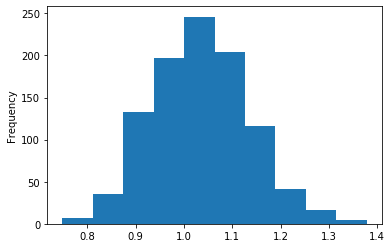

In [52]:
travel_simulated_ending_prices.plot(kind='hist', legend=None)

In [53]:
travel_percentile = travel_final_return
travel_confidence_interval=(percentileofscore(travel_simulated_ending_prices, travel_percentile))
print(f'{travel_confidence_interval}% confidence interval for travel industry')

0.0% confidence interval for travel industry


In [54]:
travel_simulated_ending_prices.value_counts(bins=50) / len(travel_simulated_ending_prices)

(1.013, 1.026]    0.061
(1.026, 1.038]    0.055
(1.038, 1.051]    0.052
(0.975, 0.988]    0.049
(1.063, 1.076]    0.045
(1.076, 1.089]    0.043
(1.089, 1.101]    0.042
(0.95, 0.963]     0.042
(0.988, 1.0]      0.042
(1.101, 1.114]    0.040
(1.0, 1.013]      0.040
(1.051, 1.063]    0.038
(0.963, 0.975]    0.037
(1.114, 1.127]    0.034
(0.899, 0.912]    0.031
(0.925, 0.937]    0.031
(1.127, 1.139]    0.030
(0.912, 0.925]    0.029
(0.937, 0.95]     0.027
(0.887, 0.899]    0.026
(1.164, 1.177]    0.025
(1.152, 1.164]    0.024
(1.139, 1.152]    0.023
(0.874, 0.887]    0.016
(1.177, 1.19]     0.014
(1.202, 1.215]    0.011
(0.849, 0.862]    0.010
(0.862, 0.874]    0.010
(1.19, 1.202]     0.009
(1.227, 1.24]     0.008
(1.215, 1.227]    0.007
(0.836, 0.849]    0.006
(0.824, 0.836]    0.006
(1.265, 1.278]    0.006
(1.24, 1.253]     0.006
(1.303, 1.316]    0.004
(0.799, 0.811]    0.003
(0.811, 0.824]    0.003
(1.29, 1.303]     0.003
(1.341, 1.354]    0.002
(1.316, 1.328]    0.002
(1.278, 1.29]   